# Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


# Data reading / loading

In [ ]:
# loading the dataset
df = pd.DataFrame("file path")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Exploration

In [4]:
# first 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# number of rows and columns
print(f"Number of rows {df.shape[0]}, Number of columns {df.shape[1]}")
print(df.shape)

Number of rows 1338, Number of columns 7
(1338, 7)


In [6]:
print("-- Attributes in Data --")
for cols in df.columns:
    print(cols)

-- Attributes in Data --
age
sex
bmi
children
smoker
region
charges


In [7]:
# informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
print("-- Number of instances in Data --")
print(df.count())

-- Number of instances in Data --
age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64


In [9]:
print("-- Number of Unique Values in Data --")
print(df.nunique())

-- Number of Unique Values in Data --
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [10]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [11]:
# statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
print("-- Details of Data --")
df.describe(include="all")

-- Details of Data --


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [13]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

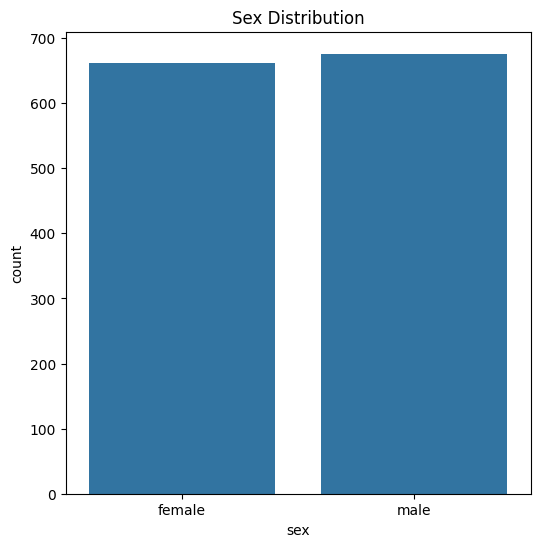

In [14]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [15]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

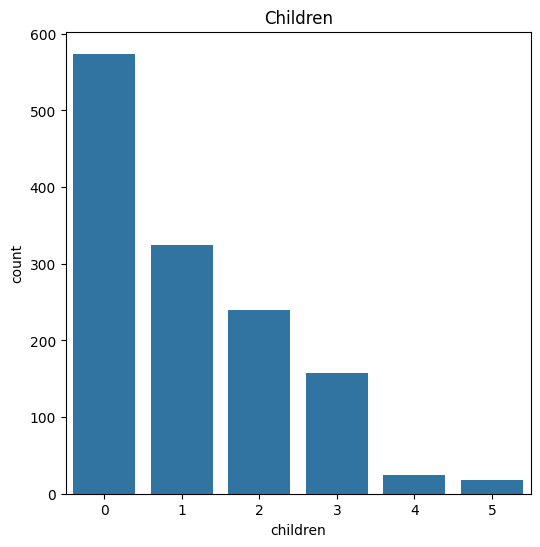

In [16]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [17]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

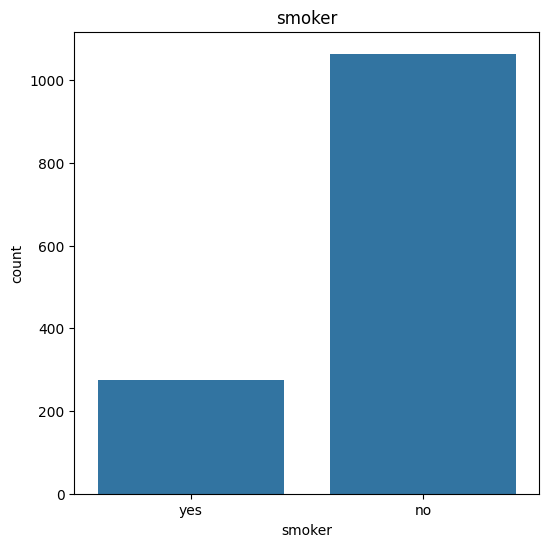

In [18]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [19]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

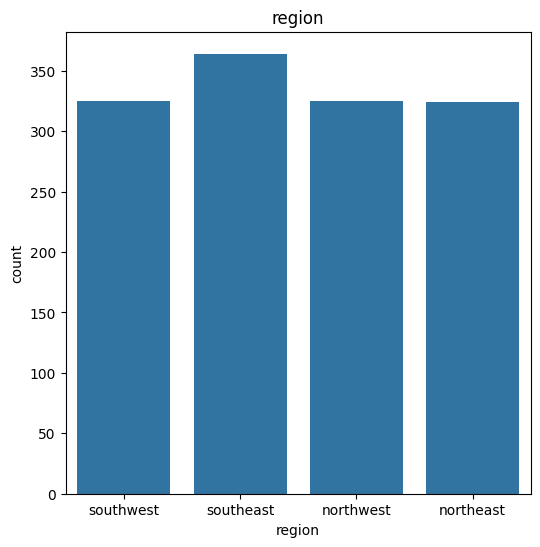

In [20]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [21]:
df['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

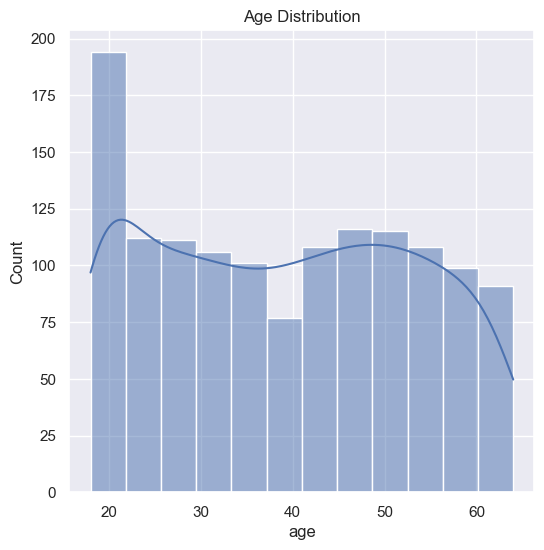

In [22]:
# Distribution of age value
sns.set()  # Set Seaborn's style
plt.figure(figsize=(6,6))  # Create a new figure with a specified size
sns.histplot(df['age'], kde=True)  # Create a histogram plot with a kernel density estimate
plt.title('Age Distribution')  # Set the title of the plot
plt.show()  # Display the plot

In [23]:
df['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

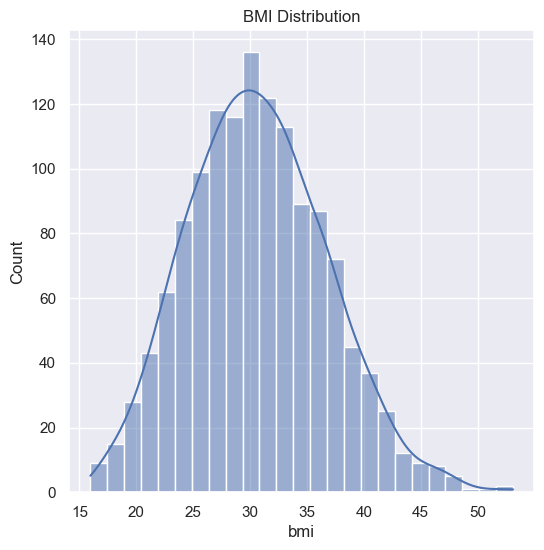

In [24]:
# BMI distribution
plt.figure(figsize=(6,6))
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

In [25]:
df['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

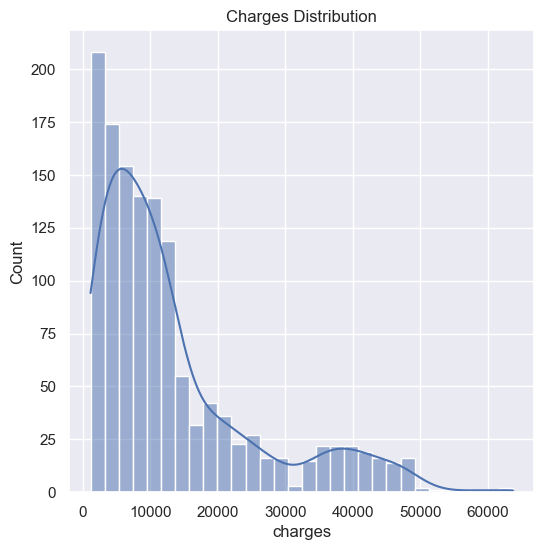

In [26]:
# Distribution of charges value
plt.figure(figsize=(6,6))
sns.histplot(df['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

# Data Pre-Processing

Encoding the categorical features

In [27]:
# Encoding 'sex' column 
df['sex'] = df['sex'].replace({'male':0, 'female':1})

# Encoding 'smoker' column 
df['smoker'] = df['smoker'].replace({'yes':0, 'no':1})

# Encoding 'region' column 
df['region'] = df['region'].replace({'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3})

C:\Users\WB\AppData\Local\Temp\ipykernel_15212\2710524933.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male':0, 'female':1})
C:\Users\WB\AppData\Local\Temp\ipykernel_15212\2710524933.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'yes':0, 'no':1})
C:\Users\WB\AppData\Local\Temp\ipykernel_15212\2710524933.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly 

Splitting the Features and Target

In [28]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [29]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [30]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the data into Training data & Testing Data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

Model Evaluation

RandomForestRegressor

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=2)

In [34]:
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=2)

In [ ]:
rf_train_preds = rf_regressor.predict(X_train)
rf_test_preds = rf_regressor.predict(X_test)

In [36]:
rf_r2_train = r2_score(Y_train, rf_train_preds)
rf_r2_test = r2_score(Y_test, rf_test_preds)

In [37]:
print("R-squared value on training data: ", rf_r2_train)


R-squared value on training data:  0.9773033000325817


Building a Predictive System


In [44]:
input_data = (31, 1, 25.74, 0, 1, 0) 

input_data_df = pd.DataFrame([input_data], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

prediction = rf_regressor.predict(input_data_df)

print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  3943.4576939000053
